# Python API Project - WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
#pprint(response)
    
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
record = 1
record_set = 1


print('''\n-----------------------------
Data Retrieval Start      
-----------------------------\n''')

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record == 51:
            record_set = record_set + 1
            record = 1
        print(f"Processing Record {record} of Set {record_set} | {city}")
        record = record + 1
                
    
    except KeyError:
        lat.append("")
        lng.append("")
        temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        print(f"City - {city} - NOT FOUND.....Skipping")

print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')        




-----------------------------
Data Retrieval Start      
-----------------------------

Processing Record 1 of Set 1 | ilebo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | waddan
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | karaton
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | cidreira
City - erhlin - NOT FOUND.....Skipping
City - taolanaro - NOT FOUND.....Skipping
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | senneterre
Processing Record 13 of Set 1 | corinto
Processing Record 14 of Set 1 | jamestown
City - nizhneyansk - NOT FOUND.....Skipping
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | castro
City - tillabery - NOT FOUND.....Skipping
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | piney green
Processing R

Processing Record 20 of Set 4 | sabang
Processing Record 21 of Set 4 | guerrero negro
Processing Record 22 of Set 4 | trelew
Processing Record 23 of Set 4 | cotonou
Processing Record 24 of Set 4 | provideniya
Processing Record 25 of Set 4 | san quintin
Processing Record 26 of Set 4 | raudeberg
Processing Record 27 of Set 4 | sao joao da barra
Processing Record 28 of Set 4 | abha
Processing Record 29 of Set 4 | avera
City - belushya guba - NOT FOUND.....Skipping
City - olafsvik - NOT FOUND.....Skipping
Processing Record 30 of Set 4 | bozhou
Processing Record 31 of Set 4 | dossor
Processing Record 32 of Set 4 | nizhniy baskunchak
Processing Record 33 of Set 4 | beloha
Processing Record 34 of Set 4 | tamiahua
Processing Record 35 of Set 4 | narsaq
Processing Record 36 of Set 4 | north myrtle beach
Processing Record 37 of Set 4 | las lomas
Processing Record 38 of Set 4 | astoria
City - bolshiye uki - NOT FOUND.....Skipping
Processing Record 39 of Set 4 | vostok
Processing Record 40 of Set 

Processing Record 41 of Set 7 | ahipara
Processing Record 42 of Set 7 | innisfail
Processing Record 43 of Set 7 | macas
Processing Record 44 of Set 7 | san andres
Processing Record 45 of Set 7 | mumford
Processing Record 46 of Set 7 | balikpapan
Processing Record 47 of Set 7 | truth or consequences
City - kuche - NOT FOUND.....Skipping
Processing Record 48 of Set 7 | bilibino
City - akyab - NOT FOUND.....Skipping
Processing Record 49 of Set 7 | staryy nadym
Processing Record 50 of Set 7 | bhanpuri
Processing Record 1 of Set 8 | inhambane
City - karkaralinsk - NOT FOUND.....Skipping
Processing Record 2 of Set 8 | paamiut
Processing Record 3 of Set 8 | novyy urgal
Processing Record 4 of Set 8 | westport
Processing Record 5 of Set 8 | sao felix do xingu
Processing Record 6 of Set 8 | kaeo
Processing Record 7 of Set 8 | prieska
Processing Record 8 of Set 8 | nome
Processing Record 9 of Set 8 | shelburne
Processing Record 10 of Set 8 | ancud
Processing Record 11 of Set 8 | vila franca do ca

Processing Record 20 of Set 11 | mocuba
Processing Record 21 of Set 11 | la asuncion
Processing Record 22 of Set 11 | avesta
Processing Record 23 of Set 11 | la cruz
Processing Record 24 of Set 11 | richards bay
Processing Record 25 of Set 11 | changuinola
Processing Record 26 of Set 11 | pundaguitan
Processing Record 27 of Set 11 | papara
Processing Record 28 of Set 11 | hirado
Processing Record 29 of Set 11 | emerald
Processing Record 30 of Set 11 | benguela
Processing Record 31 of Set 11 | muskogee
Processing Record 32 of Set 11 | quzhou
Processing Record 33 of Set 11 | gazojak
Processing Record 34 of Set 11 | wattegama
Processing Record 35 of Set 11 | champerico
Processing Record 36 of Set 11 | vytegra
City - torit - NOT FOUND.....Skipping
Processing Record 37 of Set 11 | griffith
Processing Record 38 of Set 11 | minab
City - labutta - NOT FOUND.....Skipping
Processing Record 39 of Set 11 | smithers
Processing Record 40 of Set 11 | chabahar
Processing Record 41 of Set 11 | bambous 

In [5]:
# create a data frame to hold weather information

weather_dict = {
    "City": cities,
    "Cloudiness" : cloudiness,
    "Country": country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Wind Speed" : wind_speed,
                  
}
weather_data = pd.DataFrame(weather_dict)

# Delete any rows having missing values
weather_data_df = weather_data.dropna(how="any")
weather_data_df.count()


City          641
Cloudiness    641
Country       641
Date          641
Humidity      641
Lat           641
Lng           641
Max Temp      641
Wind Speed    641
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Writing the output to csv file
weather_data_df.to_csv(output_data_file)

# Displaying the Weather data
weather_data_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ilebo,100,CD,1570678114,98,-4.33,20.59,69.28,2.15
1,mataura,100,NZ,1570678115,94,-46.19,168.86,46.99,10
2,waddan,4,LY,1570678115,76,29.16,16.14,66.36,7.72
3,saskylakh,93,RU,1570678115,94,71.97,114.09,12.47,13.44
4,rikitea,100,PF,1570678116,60,-23.12,-134.97,69.15,9.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
# Coverting object datatype to Float datatype
weather_data_df['Lat'] = pd.to_numeric(weather_data_df['Lat'])
weather_data_df['Lng'] = pd.to_numeric(weather_data_df['Lng'])
weather_data_df['Max Temp'] = pd.to_numeric(weather_data_df['Max Temp'])
weather_data_df['Cloudiness'] = pd.to_numeric(weather_data_df['Cloudiness'])
weather_data_df['Humidity'] = pd.to_numeric(weather_data_df['Humidity'])
weather_data_df['Wind Speed'] = pd.to_numeric(weather_data_df['Wind Speed'])


#### Latitude vs. Temperature Plot

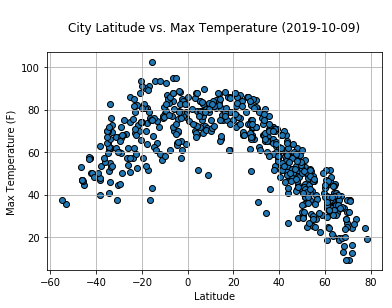

In [8]:
from datetime import date

# Build a scatter plot for each data type
plt.scatter(weather_data_df['Lat'],weather_data_df['Max Temp'], marker="o", edgecolors="black")
   
# Incorporate the other graph properties
plt.title(f"\nCity Latitude vs. Max Temperature ({date.today()})\n")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_Temperature.png")

# Show plot
plt.show()

### Analysis-

* The scatter plot shows that the temperature increases as we approach near to the equator
* The temperature decreases as we go farther from the equator.

#### Latitude vs. Humidity Plot

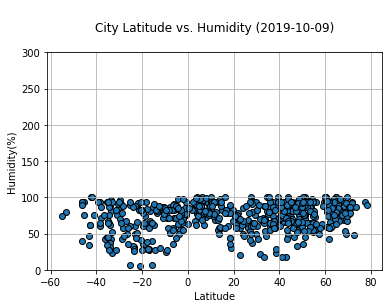

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df['Lat'],weather_data_df['Humidity'], marker="o", edgecolors="black")
          
# Incorporate the other graph properties
plt.title(f"\nCity Latitude vs. Humidity ({date.today()})\n")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,300)

# Save the figure
plt.savefig("City_Latitude_Humidity.png")

# Show plot
plt.show()


### Analysis-

* The scatter plot shows that humidity and latitude has no singnificant relationship.
* Most of the cities have higher humidity between 50-100%.

#### Latitude vs. Cloudiness Plot

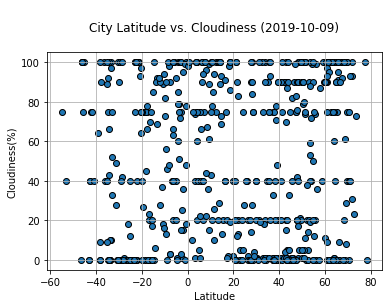

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df['Lat'],weather_data_df['Cloudiness'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"\nCity Latitude vs. Cloudiness ({date.today()})\n")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude_Cloudiness.png")

# Show plot
plt.show()


### Analysis-

* The scatter plot shows no significant relationship between latitude and cloudiness.
* Cloudiness is spread equally everywhere across the globe.

#### Latitude vs. Wind Speed Plot

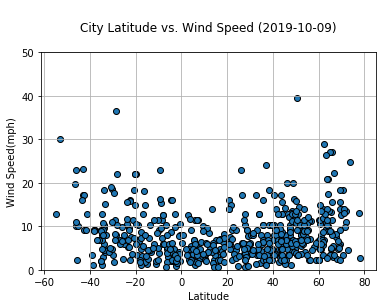

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df['Lat'],weather_data_df['Wind Speed'], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"\nCity Latitude vs. Wind Speed ({date.today()})\n")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,50)

# Save the figure
plt.savefig("City_Latitude_WindSpeed.png")

# Show plot
plt.show()


### Analysis-

* The scatter plot shows no significant relationship between latitude and wind speed.
* The wind speed less than 10mph is more common than 20mph.

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_regression(x_values, y_values, x_label, y_label, title, start_ylim, end_ylim, ann_x, ann_y, image_file):
    
     # Perform a linear regression on latitude vs. temperature
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    
    # Print r square value
    print(f"The r-squared is: {rvalue}")
    
    # Create Plot
    plt.scatter(x_values,y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(start_ylim, end_ylim)
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="red")

    # Save the figure
    plt.savefig(f"{image_file}.png")
    
    # Show plot
    plt.show() 
    

In [13]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = weather_data_df.loc[weather_data_df['Lat'] >= 0 , :]
southern_df = weather_data_df.loc[weather_data_df['Lat'] < 0 , :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.85x +90.14
The r-squared is: -0.8708534730376951


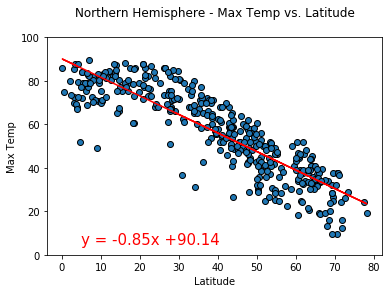

In [14]:
# Calling a function to show linear regression plot

linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp", 
                  "Northern Hemisphere - Max Temp vs. Latitude\n", 0, 100, 5, 5, 
                  "Northern Hemisphere - Max Temp vs. Latitude")


### Analysis-

* The scatter plot shows that the temperature decreases as we go farther from the equator.
* The r-squared value is near to 1, implies negative strong relationship between latitide and max temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.65x +82.19
The r-squared is: 0.6178591131806382


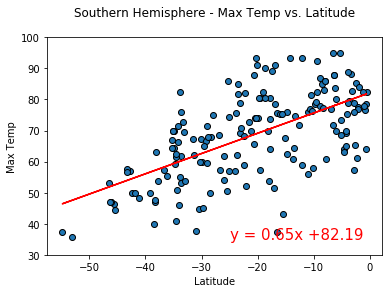

In [15]:
# Calling a function to show linear regression plot

linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude", "Max Temp", 
                  "Southern Hemisphere - Max Temp vs. Latitude\n", 30, 100, -25,35, 
                  "Southern Hemisphere - Max Temp vs. Latitude")


### Analysis-

* The scatter plot shows that the temperature increases as we go nearer towards the equator.
* The r-squared value is pretty closer to 1, implies a positive relationship between latitide and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.04x +74.15
The r-squared is: 0.048582329260777275


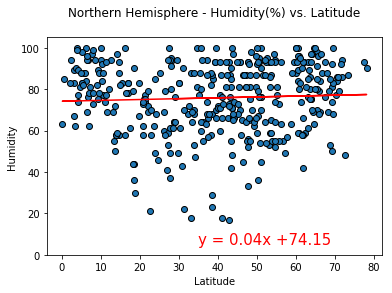

In [16]:
# Calling a function to show linear regression plot

linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude", "Humidity", 
                  "Northern Hemisphere - Humidity(%) vs. Latitude\n", 0, 105, 35, 5, 
                  "Northern Hemisphere - Humidity(%) vs. Latitude")
                  


### Analysis-

* The scatter plot shows that most of the cities that are nearer to the equator have higher humidity between 60% to 100%.
* The humidity for cities that are slightly far from equator have mix of lower and higher densities.
* The r-squared value is closer to 0, implies a weak relationship between latitide and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.07x +68.28
The r-squared is: 0.04028024961754694


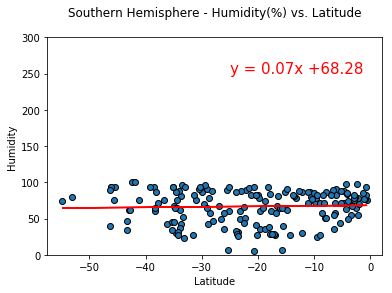

In [17]:
# Calling a function to show linear regression plot

linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity", 
                  "Southern Hemisphere - Humidity(%) vs. Latitude\n", 0, 300, -25,250, 
                 "Southern Hemisphere - Humidity(%) vs. Latitude")


### Analysis-

* The scatter plot shows that most of the cities that are nearer to the equator have higher humidity between 60% to 100%.
* The r-squared value is closer to 0, implies a weak relationship between latitide and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.11x +47.62
The r-squared is: 0.05320114694570977


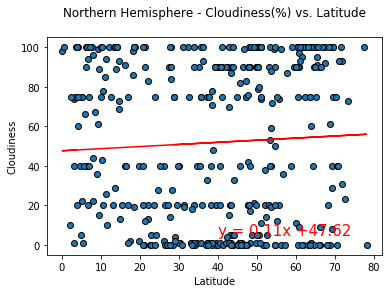

In [18]:
# Calling a function to show linear regression plot

linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness", 
                  "Northern Hemisphere - Cloudiness(%) vs. Latitude\n", -5, 105, 40,5,
                  "Northern Hemisphere - Cloudiness(%) vs. Latitude")


### Analysis-

* The cloudiness is spready equally everywhere.
* The r-squared value is closer to 0, implies a weak relationship between latitide and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.24x +53.37
The r-squared is: 0.08135585900990448


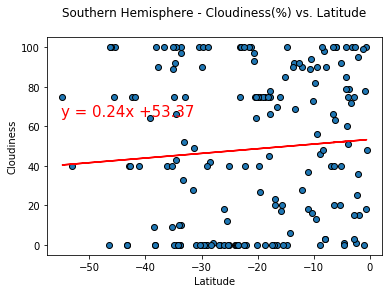

In [19]:
# Calling a function to show linear regression plot

linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness", 
                  "Southern Hemisphere - Cloudiness(%) vs. Latitude\n", -5, 105, -55,65, 
                 "Southern Hemisphere - Cloudiness(%) vs. Latitude")


### Analysis-

* The scatter plot shows no significant relationship between latitide and cloudiness.
* The r-squared value is closer to 0, implies a very weak relationship between latitide and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.08x +4.58
The r-squared is: 0.2725736441281722


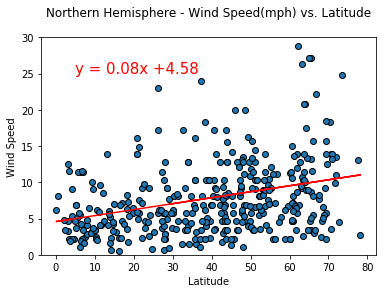

In [20]:
# Calling a function to show linear regression plot

linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude", "Wind Speed", 
                  "Northern Hemisphere - Wind Speed(mph) vs. Latitude\n", 0, 30, 5, 25,
                 "Northern Hemisphere - Wind Speed(mph) vs. Latitude")


### Analysis-

* The scatter plot shows no significant relationship between latitide and wind speed.
* The r-squared value is closer to 0, implies a weak relationship between latitide and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x +5.44
The r-squared is: -0.31832534428578


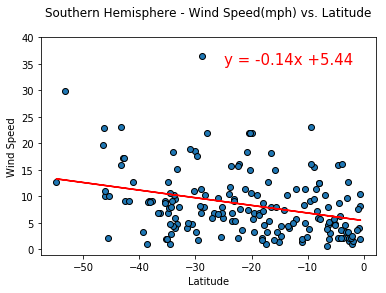

In [21]:
# Calling a function to show linear regression plot

linear_regression(southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed", 
                  "Southern Hemisphere - Wind Speed(mph) vs. Latitude\n", -1, 40, -25,35, 
                 "Southern Hemisphere - Wind Speed(mph) vs. Latitude")


### Analysis-

* The scatter plot shows no significant relationship between latitide and wind speed.
* The r-squared value is closer to 0, implies a weak relationship between latitide and wind speed.

# Three observable trends
* Temperature increases as we approach near to the equator. It means that cities that are near to equator are hotter than those   that are far from it.
* There is a strong relationship between latitude and max temperature.
* There is a weak relationship between latitude and [cloudiness, wind speed, humidity].
